In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Loading the dataset

In [ ]:
import pandas as pd
train_df = pd.read_csv('train.csv')
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


# Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

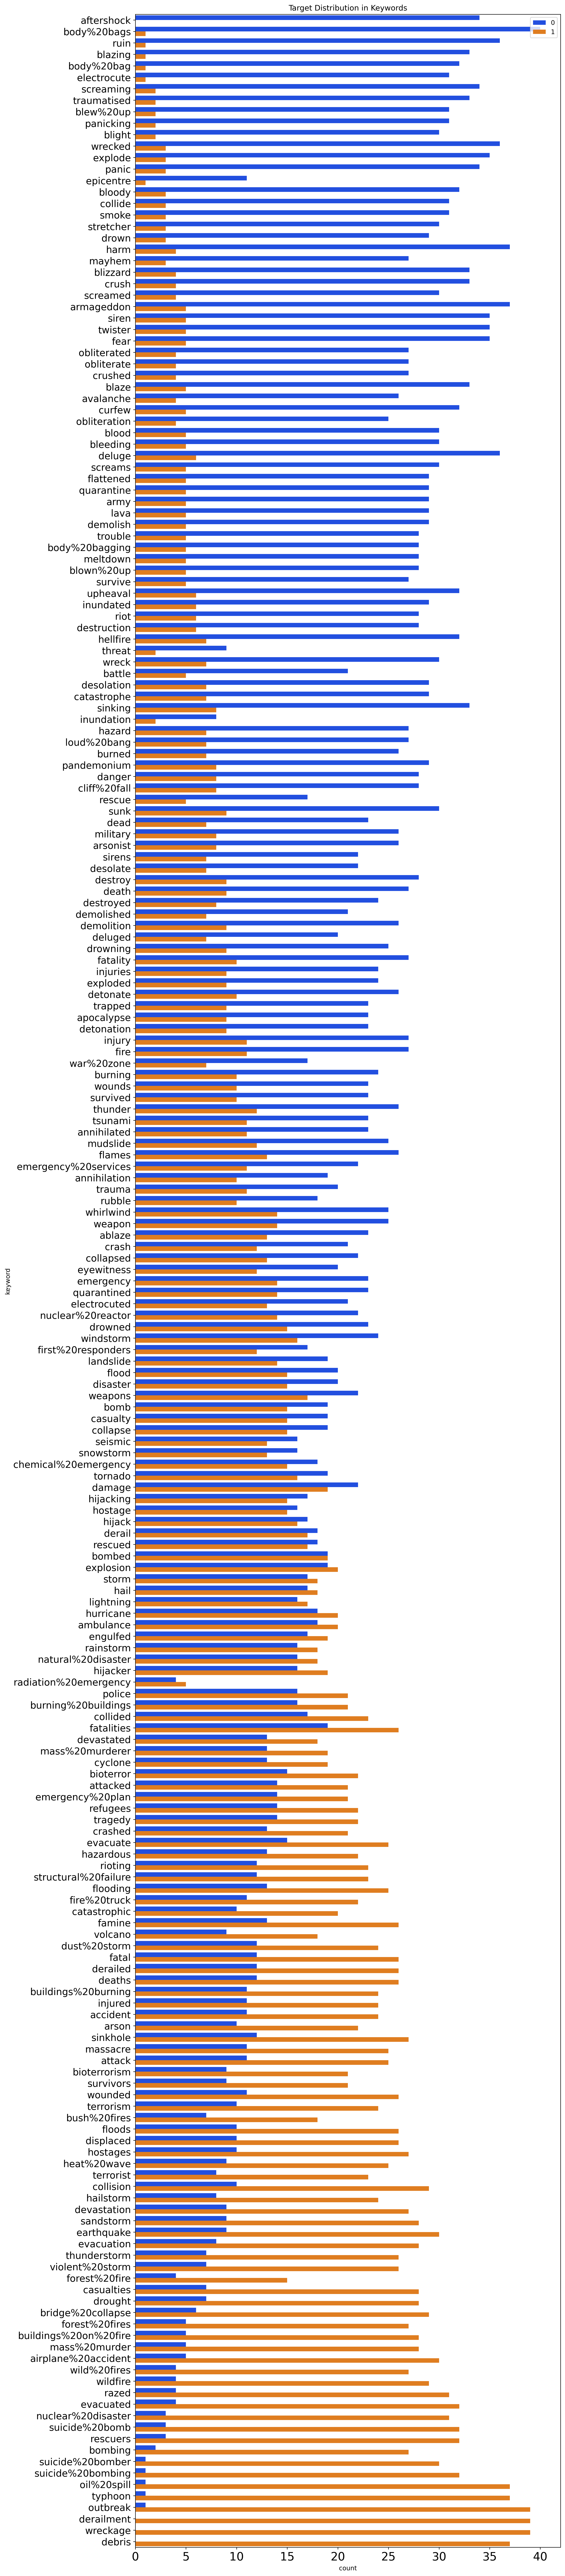

In [ ]:
train_df['target_mean'] = train_df.groupby(
    'keyword')['target'].transform('mean')

figure = plt.figure(figsize=(12, 72), dpi=256)

sorted_train_data = train_df.sort_values(by='target_mean', ascending=True)

sns.countplot(y=sorted_train_data['keyword'],
              hue=sorted_train_data['target'], palette='bright')

plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=15)
plt.legend(loc=1)
plt.title('Target Distribution in Keywords')

plt.show()

<ipython-input-7-730e4bf72e81>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=train_df['keyword'], order=train_df['keyword'].value_counts(


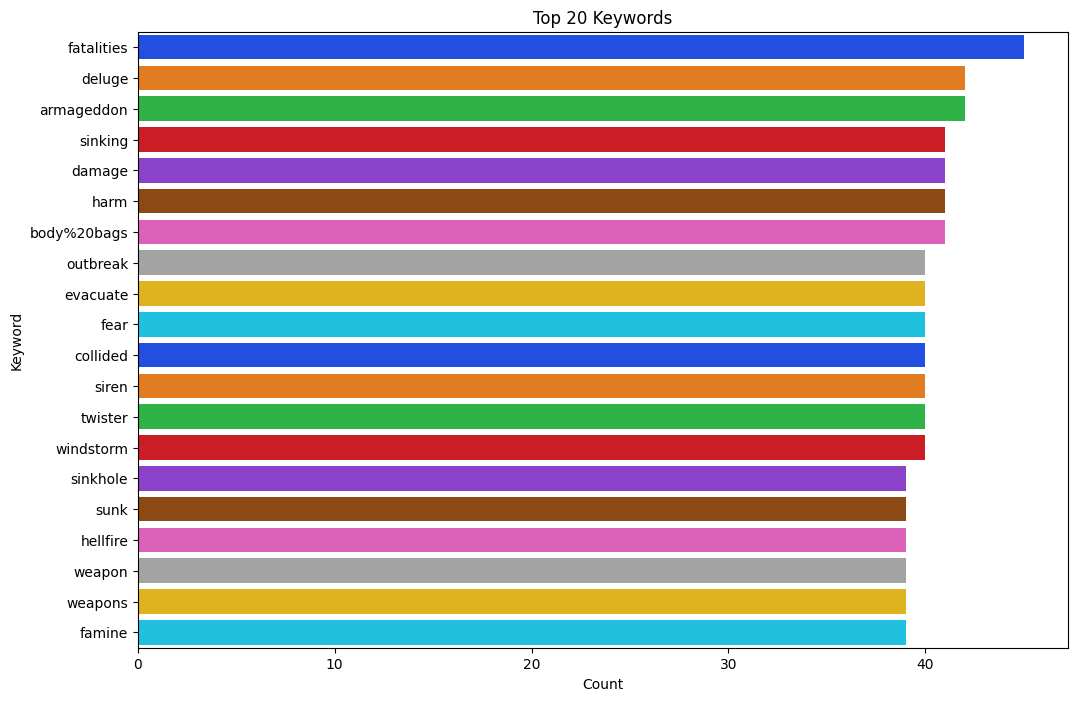

In [ ]:
# We will not take all the keywords we will take only the top 20 keywords

plt.figure(figsize=(12, 8))
sns.countplot(y=train_df['keyword'], order=train_df['keyword'].value_counts(
).iloc[:20].index, palette='bright')
plt.title('Top 20 Keywords')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.show()

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
train_df['text'] = train_df['text'].apply(lambda x: ' '.join(
    [word for word in x.split() if word not in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
train_df = train_df[['text','target']]
train_df

,text,target
0,Our Deeds Reason #earthquake May ALLAH Forgive us,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked 'shelter place' notified o...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent photo Ruby #Alaska smoke #wildfi...,1
...,...,...
7608,Two giant cranes holding bridge collapse nearb...,1
7609,@aria_ahrary @TheTawniest The control wild fir...,1
7610,M1.94 [01:04 UTC]?5km S Volcano Hawaii. http:/...,1
7611,Police investigating e-bike collided car Littl...,1


# Preprocess

In [ ]:
import re
import random
import string

In [ ]:
def remove_url(tweet):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', tweet)


def remove_html(tweet):
    html = re.compile(r'<.*?>')
    return html.sub(r'', tweet)


def remove_emoji(tweet):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

In [ ]:
def special_characters(tweet):

    tweet = re.sub(r"SuruÌ¤", "Suruc", tweet)
    tweet = re.sub(r"JapÌ_n", "Japan", tweet)
    tweet = re.sub(r"\x89ÛÏWhen", "When", tweet)
    tweet = re.sub(r"å£3million", "3 million", tweet)
    tweet = re.sub(r"fromåÊwounds", "from wounds", tweet)
    tweet = re.sub(r"mÌ¼sica", "music", tweet)
    tweet = re.sub(r"donå«t", "do not", tweet)
    tweet = re.sub(r"didn`t", "did not", tweet)
    tweet = re.sub(r"i\x89Ûªm", "I am", tweet)
    tweet = re.sub(r"I\x89Ûªm", "I am", tweet)
    tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
    tweet = re.sub(r"It\x89Ûªs", "It is", tweet)
    tweet = re.sub(r"i\x89Ûªd", "I would", tweet)
    tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
    tweet = re.sub(r"i\x89Ûªve", "I have", tweet)
    tweet = re.sub(r"I\x89Ûªve", "I have", tweet)
    tweet = re.sub(r"let\x89Ûªs", "let us", tweet)
    tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
    tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
    tweet = re.sub(r"that\x89Ûªs", "that is", tweet)
    tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
    tweet = re.sub(r"here\x89Ûªs", "here is", tweet)
    tweet = re.sub(r"Here\x89Ûªs", "Here is", tweet)
    tweet = re.sub(r"you\x89Ûªre", "you are", tweet)
    tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
    tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
    tweet = re.sub(r"You\x89Ûªve", "You have", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"You\x89Ûªll", "You will", tweet)
    tweet = re.sub(r"China\x89Ûªs", "China's", tweet)
    tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
    tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
    tweet = re.sub(r"\x89Û_", "", tweet)
    tweet = re.sub(r"\x89Û¢", "", tweet)
    tweet = re.sub(r"\x89ÛÒ", "", tweet)
    tweet = re.sub(r"\x89ÛÓ", "", tweet)
    tweet = re.sub(r"\x89ÛÏ", "", tweet)
    tweet = re.sub(r"\x89Û÷", "", tweet)
    tweet = re.sub(r"\x89Ûª", "", tweet)
    tweet = re.sub(r"\x89Û¢åÊ", "", tweet)
    tweet = re.sub(r"\x89Û\x9d", "", tweet)
    tweet = re.sub(r"å_", "", tweet)
    tweet = re.sub(r"å¨", "", tweet)
    tweet = re.sub(r"åÀ", "", tweet)
    tweet = re.sub(r"åÇ", "", tweet)
    tweet = re.sub(r"åÊ", "", tweet)
    tweet = re.sub(r"åÈ", "", tweet)
    tweet = re.sub(r"Ì©", "", tweet)

    tweet = re.sub(r"&lt;", "<", tweet)
    tweet = re.sub(r"&gt;", ">", tweet)
    tweet = re.sub(r"&amp;", "&", tweet)
    return tweet



def remove_nonASCII(tweet):
    tweet = ''.join([x for x in tweet if x in string.printable])
    return tweet

In [ ]:
def clean_others(tweet):

    tweet = re.sub(r"Dr\.", "Doctor", tweet)
    tweet = re.sub(r"f\. M\.O\.P\.", "featuring Mash Out Posse", tweet)
    tweet = re.sub(r"M\.O\.P\.", "Mash Out Posse", tweet)
    tweet = re.sub(r"M\.O\.P", "Mash Out Posse", tweet)
    tweet = re.sub(r"P\.O\.P\.E\.", "Pope", tweet)
    tweet = re.sub(r"S\.O\.S\.", "SOS", tweet)
    tweet = re.sub(r"s\.o\.s\.", "SOS", tweet)
    tweet = re.sub(r"Fire Co\.", "Fire Company", tweet)
    tweet = re.sub(r"Holt and Co\.", "Holt and Company", tweet)
    tweet = re.sub(r"roofing co\.", "roofing company", tweet)
    tweet = re.sub(r"Costa Co\.", "Costa County", tweet)
    tweet = re.sub(r"York Co\.", "York County", tweet)
    tweet = re.sub(r"Fairfax Co\.", "Fairfax County", tweet)
    tweet = re.sub(r"I\.S\.I\.S\.", "ISIS", tweet)
    tweet = re.sub(r"U\.N\.", "United Nations", tweet)
    tweet = re.sub(r"U\.S\.", "United States", tweet)
    tweet = re.sub(r"U\.S", "United States", tweet)
    tweet = re.sub(r"U\.s\.", "United States", tweet)
    tweet = re.sub(r"U\.s", "United States", tweet)
    tweet = re.sub(r"U-S\.", "United States", tweet)
    tweet = re.sub(r"U\.S National", "United States National", tweet)
    tweet = re.sub(r"LANCASTER N\.H\.", "Lancaster New Hampshire", tweet)
    tweet = re.sub(r"Manchester N\.H\.", "Manchester New Hampshire", tweet)

    return tweet

In [ ]:
def specific_corrections(tweet):

    tweet = re.sub(r"b/c", "because", tweet)
    tweet = re.sub(r"w/e", "whatever", tweet)
    tweet = re.sub(r"w/out", "without", tweet)
    tweet = re.sub(r"w/o", "without", tweet)
    tweet = re.sub(r"w/", "with ", tweet)
    tweet = re.sub(r"<3", "love", tweet)
    tweet = re.sub(r"c/o", "care of", tweet)
    tweet = re.sub(r"p/u", "pick up", tweet)
    tweet = re.sub(r"\n", " ", tweet)

    tweet = re.sub(r"Trfc", "Traffic", tweet)
    tweet = re.sub(r"recentlu", "recently", tweet)
    tweet = re.sub(r"Ph0tos", "Photos", tweet)
    tweet = re.sub(r"exp0sed", "exposed", tweet)
    tweet = re.sub(r"amageddon", "armageddon", tweet)
    tweet = re.sub(r"TRAUMATISED", "traumatized", tweet)
    tweet = re.sub(r"Newss", "News", tweet)
    tweet = re.sub(r"remedyyyy", "remedy", tweet)
    tweet = re.sub(r"Bstrd", "bastard", tweet)
    tweet = re.sub(r"bldy", "bloody", tweet)
    tweet = re.sub(r"epicenterr", "epicenter", tweet)
    tweet = re.sub(r"approachng", "approaching", tweet)
    tweet = re.sub(r"evng", "evening", tweet)
    tweet = re.sub(r"Sumthng", "something", tweet)
    tweet = re.sub(r"kostumes", "costumes", tweet)
    tweet = re.sub(r"glowng", "glowing", tweet)
    tweet = re.sub(r"kindlng", "kindling", tweet)
    tweet = re.sub(r"riggd", "rigged", tweet)
    tweet = re.sub(r"HLPS", "helps", tweet)
    tweet = re.sub(r"SNCTIONS", "sanctions", tweet)
    tweet = re.sub(r"Politifiact", "PolitiFact", tweet)
    tweet = re.sub(r"Kowing", "Knowing", tweet)
    tweet = re.sub(r"wrld", "world", tweet)
    tweet = re.sub(r"shld", "should", tweet)
    tweet = re.sub(r"thruuu", "through", tweet)
    tweet = re.sub(r"probaly", "probably", tweet)
    tweet = re.sub(r"whatevs", "whatever", tweet)
    tweet = re.sub(r"colomr", "colour", tweet)
    tweet = re.sub(r"pileq", "pile", tweet)
    tweet = re.sub(r"firefightr", "firefighter", tweet)
    tweet = re.sub(r"LAIGHIGN", "laughing", tweet)
    tweet = re.sub(r"EXCLUSIV", "Exclusive", tweet)
    tweet = re.sub(r"belo-ooow", "below", tweet)
    tweet = re.sub(r"who-ooo-ole", "whole", tweet)
    tweet = re.sub(r"brother-n-law", "father-in-law", tweet)
    tweet = re.sub(r"referencereference", "reference", tweet)

    return tweet

In [ ]:
def expand_contractions(tweet):

    tweet = re.sub(r"I'm", "I am", tweet)
    tweet = re.sub(r"I'M", "I am", tweet)
    tweet = re.sub(r"i'm", "I am", tweet)
    tweet = re.sub(r"i'M", "I am", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"I'd", "I would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"I'll", "I will", tweet)
    tweet = re.sub(r"i've", "I have", tweet)
    tweet = re.sub(r"I've", "I have", tweet)
    tweet = re.sub(r"you're", "you are", tweet)
    tweet = re.sub(r"You're", "You are", tweet)
    tweet = re.sub(r"you'd", "you would", tweet)
    tweet = re.sub(r"You'd", "You would", tweet)
    tweet = re.sub(r"you've", "you have", tweet)
    tweet = re.sub(r"You've", "You have", tweet)
    tweet = re.sub(r"you'll", "you will", tweet)
    tweet = re.sub(r"You'll", "You will", tweet)
    tweet = re.sub(r"y'know", "you know", tweet)
    tweet = re.sub(r"Y'know", "You know", tweet)
    tweet = re.sub(r"y'all", "you all", tweet)
    tweet = re.sub(r"Y'all", "You all", tweet)
    tweet = re.sub(r"we're", "we are", tweet)
    tweet = re.sub(r"We're", "We are", tweet)
    tweet = re.sub(r"we've", "we have", tweet)
    tweet = re.sub(r"We've", "We have", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"We'd", "We would", tweet)
    tweet = re.sub(r"WE'VE", "We have", tweet)
    tweet = re.sub(r"we'll", "we will", tweet)
    tweet = re.sub(r"We'll", "We will", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"They're", "They are", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"They'd", "They would", tweet)
    tweet = re.sub(r"they've", "they have", tweet)
    tweet = re.sub(r"They've", "They have", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"They'll", "They will", tweet)
    tweet = re.sub(r"he's", "he is", tweet)
    tweet = re.sub(r"He's", "He is", tweet)
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"He'll", "He will", tweet)
    tweet = re.sub(r"she's", "she is", tweet)
    tweet = re.sub(r"She's", "She is", tweet)
    tweet = re.sub(r"she'll", "she will", tweet)
    tweet = re.sub(r"She'll", "She will", tweet)
    tweet = re.sub(r"it's", "it is", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"it'll", "it will", tweet)
    tweet = re.sub(r"It'll", "It will", tweet)
    tweet = re.sub(r"isn't", "is not", tweet)
    tweet = re.sub(r"Isn't", "Is not", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"Who's", "Who is", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"What's", "What is", tweet)
    tweet = re.sub(r"that's", "that is", tweet)
    tweet = re.sub(r"That's", "That is", tweet)
    tweet = re.sub(r"here's", "here is", tweet)
    tweet = re.sub(r"Here's", "Here is", tweet)
    tweet = re.sub(r"there's", "there is", tweet)
    tweet = re.sub(r"There's", "There is", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Where's", "Where is", tweet)
    tweet = re.sub(r"wHeRE's", "where is", tweet)
    tweet = re.sub(r"how's", "how is", tweet)
    tweet = re.sub(r"How's", "How is", tweet)
    tweet = re.sub(r"how're", "how are", tweet)
    tweet = re.sub(r"How're", "How are", tweet)
    tweet = re.sub(r"let's", "let us", tweet)
    tweet = re.sub(r"Let's", "Let us", tweet)
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"wasn't", "was not", tweet)
    tweet = re.sub(r"aren't", "are not", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"shouldn't", "should not", tweet)
    tweet = re.sub(r"haven't", "have not", tweet)
    tweet = re.sub(r"Haven't", "Have not", tweet)
    tweet = re.sub(r"hasn't", "has not", tweet)
    tweet = re.sub(r"wouldn't", "would not", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"Weren't", "Were not", tweet)
    tweet = re.sub(r"ain't", "am not", tweet)
    tweet = re.sub(r"Ain't", "am not", tweet)
    tweet = re.sub(r"don't", "do not", tweet)
    tweet = re.sub(r"Don't", "do not", tweet)
    tweet = re.sub(r"DON'T", "Do not", tweet)
    tweet = re.sub(r"didn't", "did not", tweet)
    tweet = re.sub(r"Didn't", "Did not", tweet)
    tweet = re.sub(r"DIDN'T", "Did not", tweet)
    tweet = re.sub(r"doesn't", "does not", tweet)
    tweet = re.sub(r"can't", "cannot", tweet)
    tweet = re.sub(r"Can't", "Cannot", tweet)
    tweet = re.sub(r"Could've", "Could have", tweet)
    tweet = re.sub(r"should've", "should have", tweet)
    tweet = re.sub(r"would've", "would have", tweet)

    return tweet

In [ ]:
def remove_non_alnum(tweet):
    punctuation = re.compile('[^A-Za-z0-9]+')
    return punctuation.sub(r' ', tweet)


def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)


def remove_extra_spaces(text):
    text = re.sub('\s+', ' ', text).strip()
    return text

In [ ]:
# first remove all the characters except the alphabets
import re
import random

def prep_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text) # Removing the links
    text = re.sub(r'#\w+', '', text) # removing the hashtags
    text = re.sub(r'@\w+', '', text) # removing the mentions @
    text = re.sub(r'[^a-z ]', '', text) # removing characters other than a-z
    text = remove_emoji(text) # removing the emojis
    text = remove_html(text) # removing the html tags
    text = remove_punct(text) # removing the punctuations
    text = specific_corrections(text) # correcting some specific words
    text = expand_contractions(text) # expanding the contractions
    text = remove_nonASCII(text) # removing the non-ascii characters
    text = special_characters(text) # removing the special characters
    text = remove_non_alnum(text) # removing the non-alphanumeric characters
    text = remove_extra_spaces(text) # removing the extra spaces
    text = text.strip() # removing the whitespaces

    return text

sample = random.choice(train_df['text'])
print(f"Sample sentence :\n{sample}\n")

print(f"Preprocessed sentence :")
prep_text(sample)

Sample sentence :
The ol' meltdown victory Mets.

Preprocessed sentence :


'the ol meltdown victory mets'

In [ ]:
train_df['text'] = train_df['text'].apply(prep_text)
train_df

<ipython-input-18-ee5913be04ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['text'] = train_df['text'].apply(prep_text)


,text,target
0,our deeds reason may allah forgive us,1
1,forest fire near la ronge sask canada,1
2,all residents asked shelter place notified off...,1
3,people receive evacuation orders california,1
4,just got sent photo ruby smoke pours school,1
...,...,...
7608,two giant cranes holding bridge collapse nearb...,1
7609,the control wild fires california even norther...,1
7610,m utckm s volcano hawaii,1
7611,police investigating ebike collided car little...,1


# Visualization of Dataset

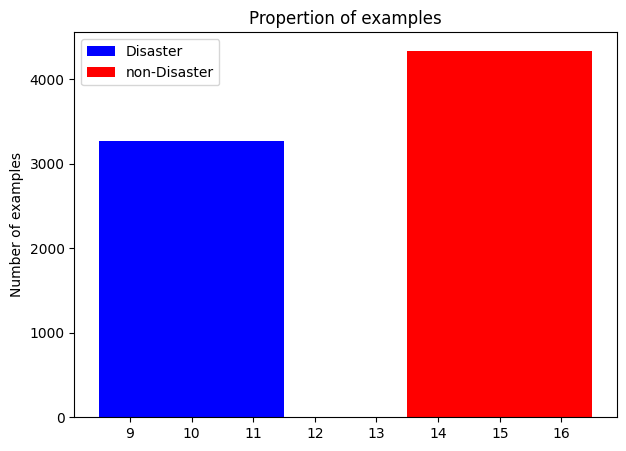

In [ ]:
Real_len = train_df[train_df['target'] == 1].shape[0]
Not_len = train_df[train_df['target'] == 0].shape[0]

plt.rcParams['figure.figsize'] = (7, 5)
plt.bar(10, Real_len, 3, label="Disaster", color='blue')
plt.bar(15, Not_len, 3, label="non-Disaster", color='red')
plt.legend()
plt.ylabel('Number of examples')
plt.title('Propertion of examples')
plt.show()

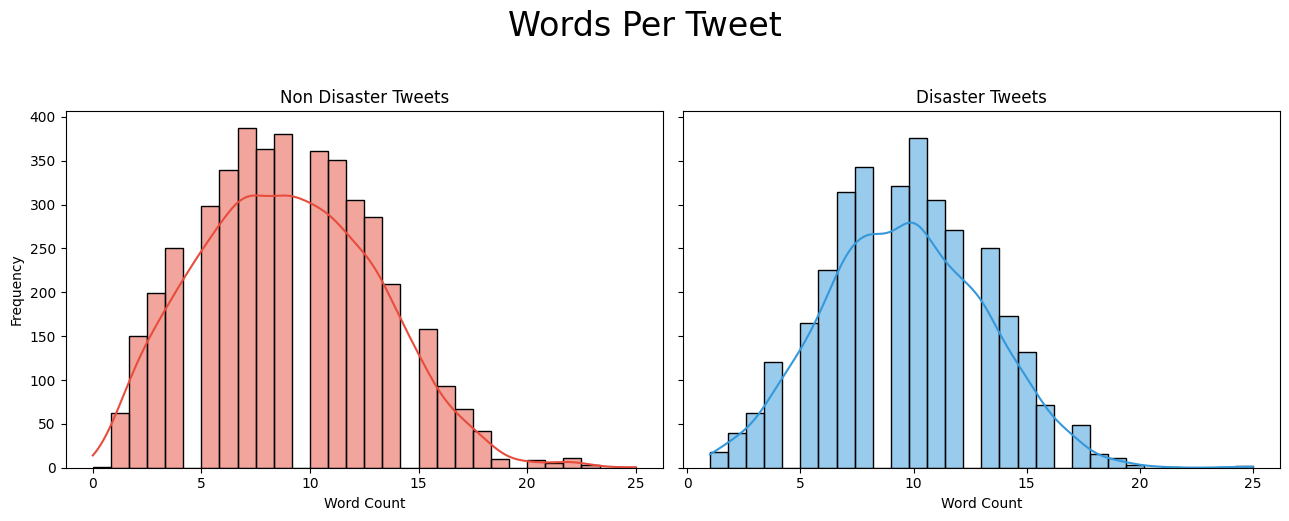

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_word_number_histogram(textno, textyes):
    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(13, 5), sharey=True)
    sns.histplot(textno.str.split().map(lambda x: len(x)),
                 ax=axes[0], color='#e74c3c', kde=True, bins=30)
    sns.histplot(textyes.str.split().map(lambda x: len(x)),
                 ax=axes[1], color='#3498db', kde=True, bins=30)

    axes[0].set_xlabel('Word Count')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Non Disaster Tweets')
    axes[1].set_xlabel('Word Count')
    axes[1].set_title('Disaster Tweets')

    fig.suptitle('Words Per Tweet', fontsize=24, va='baseline')
    fig.tight_layout()
    plt.show()


textno = train_df[train_df['target'] == 0]['text']
textyes = train_df[train_df['target'] == 1]['text']
plot_word_number_histogram(textno, textyes)

## Splitting into training and testing

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


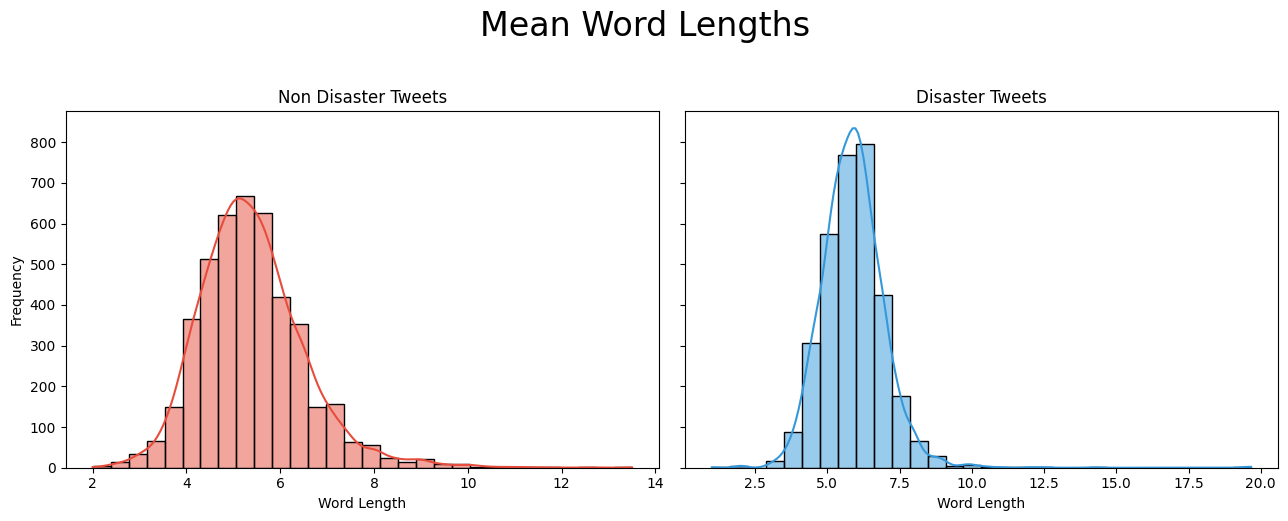

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



def plot_word_len_histogram(textno, textyes):
    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(13, 5), sharey=True)

    textno_word_len = textno.str.split().apply(
        lambda x: [len(i) for i in x]).map(lambda x: np.mean(x))
    textyes_word_len = textyes.str.split().apply(
        lambda x: [len(i) for i in x]).map(lambda x: np.mean(x))
    sns.histplot(textno_word_len, ax=axes[0],
                 color='#e74c3c', kde=True, bins=30)
    sns.histplot(textyes_word_len,
                 ax=axes[1], color='#3498db', kde=True, bins=30)

    axes[0].set_xlabel('Word Length')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Non Disaster Tweets')
    axes[1].set_xlabel('Word Length')
    axes[1].set_title('Disaster Tweets')

    fig.suptitle('Mean Word Lengths', fontsize=24, va='baseline')
    fig.tight_layout()
    plt.show()

plot_word_len_histogram(train_df[train_df['target'] == 0]
                        ['text'], train_df[train_df['target'] == 1]['text'])

In [ ]:
from sklearn.model_selection import train_test_split

train_sentences, test_sentences, train_labels, test_labels = train_test_split(train_df['text'].to_numpy(),
                                                                             train_df['target'].to_numpy(),
                                                                             test_size=0.1,
                                                                             random_state=42)

len(train_sentences), len(train_labels), len(test_sentences), len(test_labels)

(6851, 6851, 762, 762)

# Modelling

## Importing USE

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.model_download("google/universal-sentence-encoder/tensorFlow2/universal-sentence-encoder")

print("Path to model files:", path)


  0%|          | 0.00/7.84M [00:00<?, ?B/s]



  0%|          | 0.00/3.11k [00:00<?, ?B/s]


100%|██████████| 3.11k/3.11k [00:00<00:00, 72.6kB/s]



  0%|          | 1.00M/980M [00:01<17:30, 977kB/s]
 13%|█▎        | 1.00M/7.84M [00:01<00:08, 879kB/s]


  0%|          | 2.00M/980M [00:01<09:06, 1.88MB/s]
 26%|██▌       | 2.00M/7.84M [00:01<00:03, 1.71MB/s]


  0%|          | 3.00M/980M [00:01<05:45, 2.96MB/s]
 38%|███▊      | 3.00M/7.84M [00:01<00:01, 2.72MB/s]


  1%|          | 5.00M/980M [00:01<03:09, 5.39MB/s]
 64%|██████▍   | 5.00M/7.84M [00:01<00:00, 5.01MB/s]


  1%|          | 8.00M/980M [00:01<01:50, 9.24MB/s]
100%|██████████| 7.84M/7.84M [00:01<00:00, 4.55MB/s]



  1%|          | 10.0M/980M [00:01<01:29, 11.3MB/s]


  1%|          | 12.0M/980M [00:01<01:16, 13.3MB/s]


  2%|▏         | 15.0M/980M [00:02<01:05, 15.4MB/s]


  2%|▏         | 17.0M/980M [00:02<01:01, 16.4MB/s]


  2%|▏         | 20.0M/980M [00:02<00:56, 17.9MB/s]


  2%|▏         | 23.0M/980M [00:02<00:52, 19.1MB/s]


  3%|▎         | 25.0M/980M [00:02<01:

Path to model files: /root/.cache/kagglehub/models/google/universal-sentence-encoder/tensorFlow2/universal-sentence-encoder/2


In [ ]:
import tensorflow_hub as hub

In [ ]:
use_embed = hub.KerasLayer('https://kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow1/variations/universal-sentence-encoder/versions/2',
                           trainable=False,
                           name='USE_encoder'
                          )

In [ ]:
import tensorflow as tf
import random

# ... your existing code ...

sample = random.choice(train_sentences)
print(f"Real sentence:\n{sample}\n")

print(f"Numerical Encoding of the sentence:")
# Convert the sample string to a TensorFlow tensor
sample_tensor = tf.constant([sample])  # Enclose the string in a list and convert to tensor
use_embed(sample_tensor) # Pass the tensor to use_embed

Real sentence:
burst water pipe floods apartments nycha senior center ny nyburst water pipe floods a

Numerical Encoding of the sentence:


<tf.Tensor: shape=(1, 512), dtype=float32, numpy=
array([[ 0.04919216,  0.03609439, -0.03355595,  0.04810558, -0.00088918,
         0.00508929,  0.01209149, -0.06752888, -0.06262454, -0.0302522 ,
         0.00485576,  0.02353247, -0.05606472, -0.03773146,  0.04122263,
         0.0170192 ,  0.01944787,  0.00115297,  0.01415627, -0.04080482,
         0.06588741, -0.01857849, -0.02834794, -0.02117696,  0.0382567 ,
         0.04500866,  0.02520391, -0.00925413,  0.02015493, -0.05289757,
         0.05138232,  0.02581562, -0.03960238,  0.054343  ,  0.00935413,
         0.04231838,  0.05775062,  0.03052268,  0.03996236,  0.05383059,
        -0.03715916, -0.07469411, -0.01570174,  0.00103868, -0.06369263,
         0.0246348 , -0.06150451, -0.03023854, -0.07557185, -0.06312836,
         0.06575774,  0.01348616,  0.04058472, -0.05256614,  0.02599713,
         0.06442656, -0.0312744 , -0.0444352 , -0.00306463, -0.05106743,
        -0.03730696,  0.03434588, -0.01524847, -0.03888018,  0.00370527,
 

## Model Creation

In [ ]:
from tensorflow.keras import layers

class use_layer(layers.Layer):
    def call(self, input):
        return use_embed(input)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

inputs = layers.Input(shape=(), dtype=tf.string)
x = use_layer()(inputs)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_use = tf.keras.Model(inputs, outputs, name='USE_Model')

model_use.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

In [ ]:
epochs_limiter = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
)

In [ ]:
history_use = model_use.fit(train_sentences,
                            train_labels,
                            epochs=25,
                            validation_data=(test_sentences, test_labels),
                            callbacks=[epochs_limiter],
                           )

Epoch 1/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7610 - loss: 0.5603 - val_accuracy: 0.7900 - val_loss: 0.4592
Epoch 2/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8134 - loss: 0.4295 - val_accuracy: 0.8045 - val_loss: 0.4442
Epoch 3/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8097 - loss: 0.4276 - val_accuracy: 0.8045 - val_loss: 0.4404
Epoch 4/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8158 - loss: 0.4175 - val_accuracy: 0.8136 - val_loss: 0.4339
Epoch 5/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8118 - loss: 0.4158 - val_accuracy: 0.8097 - val_loss: 0.4358
Epoch 6/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8181 - loss: 0.4073 - val_accuracy: 0.8071 - val_loss: 0.4348
Epoch 7/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8167 - loss: 0.4080 - val_accuracy: 0.8136 - val_loss: 0.4338
Epoch 8/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8280 - loss: 0.3938 - val_accuracy: 

In [ ]:
model_use.evaluate(test_sentences, test_labels)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8104 - loss: 0.4180


[0.4292968213558197, 0.8123359680175781]

Our model is working good on both the training and testing dataset. Lets train the model on the whole dataset and make predicitions on the test.csv to make our submissions.csv

In [ ]:
epochs_limiter.monitor = 'loss'

In [ ]:
model_use.fit(train_df['text'].to_numpy(),
              train_df['target'].to_numpy(),
              epochs=25,
              callbacks=[epochs_limiter],
             )

Epoch 1/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8275 - loss: 0.3941
Epoch 2/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8277 - loss: 0.3955
Epoch 3/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8355 - loss: 0.3736
Epoch 4/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8310 - loss: 0.3770
Epoch 5/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.8366 - loss: 0.3732
Epoch 6/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8385 - loss: 0.3733
Epoch 7/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8366 - loss: 0.3683
Epoch 8/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8414 - loss: 0.3605
Epoch 9/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8450 - loss: 0.3646
Epoch 10/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8424 - loss: 0.3584
Epoch 11/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8509 - loss: 0.3471
Epoch 12/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 9m

# Submission

In [ ]:
# Load the test.csv
submission = pd.read_csv('test.csv')
submission[['id','text']]

,id,text
0,0,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s..."
2,3,"there is a forest fire at spot pond, geese are..."
3,9,Apocalypse lighting. #Spokane #wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...
3258,10861,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,Storm in RI worse than last hurricane. My city...
3260,10868,Green Line derailment in Chicago http://t.co/U...
3261,10874,MEG issues Hazardous Weather Outlook (HWO) htt...


In [ ]:
# Make predictions

preds = model_use.predict(submission['text'].to_numpy())
preds[:20]

102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


array([[0.31216082],
       [0.97322077],
       [0.47091007],
       [0.9946849 ],
       [0.99186665],
       [0.5516861 ],
       [0.16269888],
       [0.06760824],
       [0.26940292],
       [0.21909967],
       [0.05733566],
       [0.09363626],
       [0.11168672],
       [0.4829836 ],
       [0.10800091],
       [0.4928496 ],
       [0.38494688],
       [0.5102922 ],
       [0.3740311 ],
       [0.27357233]], dtype=float32)

In [ ]:
preds = tf.round(preds)
preds[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)>

In [ ]:
submission['target'] = preds
submission = submission[['id','target']]

In [ ]:
submission['target'] = submission['target'].astype(int)

<ipython-input-38-2b8a543d66d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['target'] = submission['target'].astype(int)


In [ ]:
# model_use.save('model.h5')

In [ ]:
import keras

# Assuming 'model_use' is your Keras model as used in a previous cell
keras.saving.save_model(model_use, "new_model2.keras") # Assuming you intend to save it to the root directory.

# Or, using a more specific filepath:
# keras.saving.save_model(model_use, "/path/to/your/model.h5")

In [ ]:
submission

,id,target
0,0,0
1,2,1
2,3,0
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [ ]:
submission.to_csv('submission.csv', index=False)

In [ ]:
import tensorflow as tf
import keras

# ... (your use_layer definition) ...

@keras.saving.register_keras_serializable()
class use_layer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(use_layer, self).__init__(**kwargs)
        self.embed = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4")

    def call(self, inputs):
        return self.embed(inputs)

    def get_config(self):
        config = super(use_layer, self).get_config()
        return config

# ... (rest of your model code) ...

# Load the model
new_model = tf.keras.models.load_model('new_model.keras', custom_objects={'use_layer': use_layer})

# Show the model architecture
new_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "USE_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None)                      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ use_layer (use_layer)                │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 65,796 (257.02 KB)

 Trainable params: 32,897 (128.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 32,899 (128.52 KB)

In [ ]:
import numpy as np

input_data = [
    "The sky turned red as wildfires spread uncontrollably. #CaliforniaFires",
    "Massive earthquake hits downtown, buildings crumbling! #earthquake #disaster",
    "Tornado warnings issued for the area, take shelter immediately! #TornadoAlert",
    "Floodwaters have submerged entire neighborhoods. #Flood #Disaster",
    "Apocalypse lighting in the sky from wildfires. #Spokane #wildfires",
    "Devastating hurricane destroys homes and uproots lives. #HurricaneSeason",
    "Multiple casualties reported in the train derailment. #TrainAccident",
    "Rescue teams searching for survivors in the rubble after a major landslide. #Landslide",
    "Severe drought leads to widespread famine in the region. #DroughtCrisis",
    "Volcanic eruption forces mass evacuations in nearby towns. #Volcano",
    "Huge explosion rocks the city center, emergency response underway. #Explosion",
    "Thousands displaced after the river burst its banks. #Flooding #Emergency",
    "Category 5 hurricane heading straight for the coastline. #HurricaneWarning",
    "Wildfires continue to rage, consuming everything in their path. #WildfireDisaster",
    "Tsunami alert issued after undersea earthquake. #TsunamiWarning",
    "Avalanche sweeps through the mountain village, several missing. #Avalanche",
    "Rescue operations ongoing after the devastating building collapse. #BuildingCollapse",
    "Chemical spill prompts evacuation of nearby communities. #ChemicalSpill",
    "Cyclone approaching, authorities warn residents to prepare. #CycloneAlert",
    "Forest fires out of control, spreading towards populated areas. #ForestFire",
    "We're shaking...It's an earthquake"
]

# Convert input data to a NumPy array with dtype=object for text data
for i in input_data:
  predictions = np.array([i], dtype=object)

  # Make predictions using the loaded model
  new_model_predictions = new_model.predict(predictions)

  # Process and print rounded prediction
  print(tf.round(new_model_predictions)[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
tf.Tensor(1.0, shape=(), dtype=float32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
tf.Tensor(0.0, shape=(), dtype=float32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
tf.Tensor(0.0, shape=(), dtype=float32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
tf.Tensor(0.0, shape=(), dtype=float32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
tf.Tensor(0.0, shape=(), dtype=float32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
tf.Tensor(0.0, shape=(), dtype=float32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
tf.Tensor(0.0, shape=(), dtype=float32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
tf.Tensor(0.0, shape=(), dtype=float32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
tf.Tensor(1.0, shape=(), dtype=float32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
tf.Tensor(0.0, shape=(), dtype=float32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
tf.Tensor(0.0, shape=(), dtype=float32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
tf.Tensor(0.0, shape=(), dtype=float32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
tf.Tensor(0.0, shape=(), 

In [ ]:
import streamlit as st
def predict_the_output(text):
  predictions = np.array([i], dtype=object)

  # Make predictions using the loaded model
  new_model_predictions = new_model.predict(predictions)

  # Process and print rounded prediction
  print(tf.round(new_model_predictions)[0][0])

In [ ]:
%pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 6.8 MB/s eta 0:00:00


In [ ]:
!wget -q -O - ipv4.icanhazip.com

35.229.190.88


In [ ]:
%%writefile app.py
import streamlit as st
def main():
    html_temp = """
    <div style="background-color:green;padding:10px;margin-bottom:20px;">
    <h2 style="color:white;text-align:center;">Disaster Tweet Detection</h2>
    </div>
    """
    st.markdown(html_temp, unsafe_allow_html=True)

    st.text("Paste the text for prediction")

    text = st.text_area("Text", "Type Here")
    if text:
        result = ""
        if st.button("Predict"):
            result = predict_the_output(text)
            if result[0] == 1:  # Adjust threshold based on your model
                st.success('Disaster Tweet')
            else:
                st.error('Non Disaster Tweet')


if __name__ == '__main__':
    main()

Overwriting app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.229.190.88:8501

your url is: https://angry-yaks-chew.loca.lt
2024-10-19 21:41:17.866 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/exec_code.py", line 88, in exec_func_with_error_handling
    result = func()
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 579, in code_to_exec
    exec(code, module.__dict__)
  File "/content/app.py", line 24, in <module>
    main()
  File "/content/app.py", line 16, in main
    result = predict_the_output(text)
NameError: name 'predict_the_output' is not defined
